In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.DataFrame([
    [0,0,0],
    [1,0,1],
    [0,1,1],
    [1,1,0],
] * 1000)


In [3]:
df.columns = ['x1','x2','y']

In [4]:
df.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [5]:
df

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0
4,0,0,0
...,...,...,...
3995,1,1,0
3996,0,0,0
3997,1,0,1
3998,0,1,1


In [6]:
df['x1'] += np.random.normal(size=4000) * 0.1
df['x2'] += np.random.normal(size=4000) * 0.1


In [7]:
df

,x1,x2,y
0,-0.052787,0.117453,0
1,1.048468,0.095426,1
2,0.064382,1.000777,1
3,0.997912,1.198509,0
4,-0.216360,0.110971,0
...,...,...,...
3995,1.120193,1.059698,0
3996,-0.003712,-0.042684,0
3997,0.988430,-0.049035,1
3998,-0.122636,1.024279,1


<Axes: xlabel='x1', ylabel='x2'>

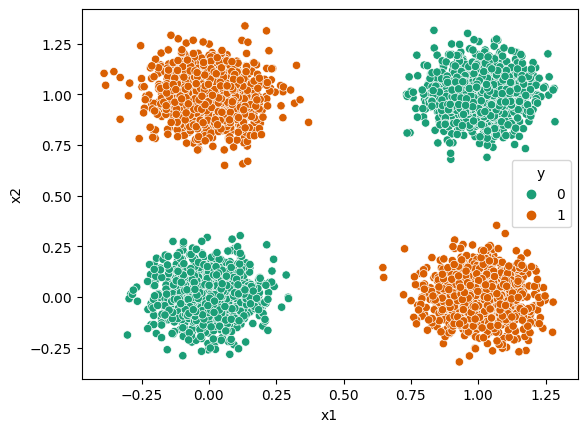

In [8]:
sns.scatterplot(data=df,x='x1', y='x2', hue='y', palette='Dark2')

In [9]:
X , test = train_test_split(df,test_size=0.3)

**Let's define a Sigmoid function**

In [10]:
def sig(z):
    return (1/(1 + np.exp(-2)))

**Matrix of the coefficients**

In [11]:
W = np.array([[1,-1,0.],[-1,1,0.]]) # Use dot to make it float for np
U = np.array([1,1,0])

In [12]:
W

array([[ 1., -1.,  0.],
       [-1.,  1.,  0.]])

In [13]:
# Learning rate 
lr = 0.001

In [14]:
for re in range(500):
    # keep the total error 
    total_error = 0.0
    # Gradient of the matrix U 
    DUf = U * 0.0
    # Gradient of the matrix U 
    DWf = W * 0.0
    
    # Coefficients of w1 w2 and b1 are from W[0]
    w11 , w21 , b1 = W[0]
    
    w12 , w22 , b2 = W[1]
    
    u1 , u2 , c  = U
    
    for index , row in X.iterrows():
        x1 , x2 , y = row
        A1 = sig(w11*x1 + w21*x2 + b1)
        A2 = sig(w12*x1 + w22*x2 + b2)
        A3 = sig(u1*A1 + u2*A2 + c)
        err = A3 - y
        DUf += err * np.array([A1,A2,1])
        DWf += err * np.array([u1 * A1*(1-A1), u2 * A2*(1-A2)]).reshape((2,1)) @ np.array([x1,x2,1]).reshape(1,3)
        total_error += err ** 2
        
    U = U - lr * DUf
    W = W - lr * DWf
    
    if re%10 == 0:
        print(re, total_error)

0 1084.6933245034008
10 1084.6933245034008
20 1084.6933245034008
30 1084.6933245034008
40 1084.6933245034008
50 1084.6933245034008
60 1084.6933245034008
70 1084.6933245034008
80 1084.6933245034008
90 1084.6933245034008
100 1084.6933245034008
110 1084.6933245034008
120 1084.6933245034008
130 1084.6933245034008
140 1084.6933245034008
150 1084.6933245034008
160 1084.6933245034008
170 1084.6933245034008
180 1084.6933245034008
190 1084.6933245034008
200 1084.6933245034008
210 1084.6933245034008
220 1084.6933245034008
230 1084.6933245034008
240 1084.6933245034008
250 1084.6933245034008
260 1084.6933245034008
270 1084.6933245034008
280 1084.6933245034008
290 1084.6933245034008
300 1084.6933245034008
310 1084.6933245034008
320 1084.6933245034008
330 1084.6933245034008
340 1084.6933245034008
350 1084.6933245034008
360 1084.6933245034008
370 1084.6933245034008
380 1084.6933245034008
390 1084.6933245034008
400 1084.6933245034008
410 1084.6933245034008
420 1084.6933245034008
430 1084.6933245034008

In [15]:
def predict(df):
    output = []
    # Coefficients of w1 w2 and b1 are from W[0]
    w11 , w21 , b1 = W[0]
    
    w12 , w22 , b2 = W[1]
    
    u1 , u2 , c  = U
    
    for index , row in df.iterrows():
        x1 , x2 , y = row
        A1 = sig(w11*x1 + w21*x2 + b1)
        A2 = sig(w12*x1 + w22*x2 + b2)
        A3 = sig(u1*A1 + u2*A2 + c)
        
        output.append(np.round(A3))
    
    return (pd.Series(output))
    
    

In [16]:
from sklearn.metrics import classification_report

print(classification_report(test['y'], predict(test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       628
           1       0.48      1.00      0.65       572

    accuracy                           0.48      1200
   macro avg       0.24      0.50      0.32      1200
weighted avg       0.23      0.48      0.31      1200



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
